### Importación de datos



In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

store1 = pd.read_csv(url1)
store2 = pd.read_csv(url2)
store3 = pd.read_csv(url3)
store4 = pd.read_csv(url4)


# Agregamos un identificador  
Se agrega la columna identificador para poder "Agrupar las tiendas" cuando se consolide el dataset, esto para no tener la data dispersa en varios lados ademas de unificarlo en una variable ara mas facilidad

In [4]:

store1['Tienda'] = 'Tienda A'
store2['Tienda'] = 'Tienda B'
store3['Tienda'] = 'Tienda C'
store4['Tienda'] = 'Tienda D'

df = pd.concat([store1 , store2 , store3 , store4])

#1. Análisis de facturación



Utilizando nuestro dataset unificado, agregamos el valor de la facturacion (Al no haber columna de Cantidad por venta se considera 1). Finalmente agrupamos en base a la tienda (Tienda A, Tienda B, Tienda C, Tienda D)

In [39]:
# Cantidad vendida no definida en dataset (consideramos 1)
ammount_sale = 1

#Obtenemos la facturacion
df['Facturación'] = df['Precio'] * ammount_sale
total_invoice = df.groupby('Tienda')['Facturación'].sum().reset_index()
total_invoice = total_invoice.sort_values(by='Facturación', ascending=False)

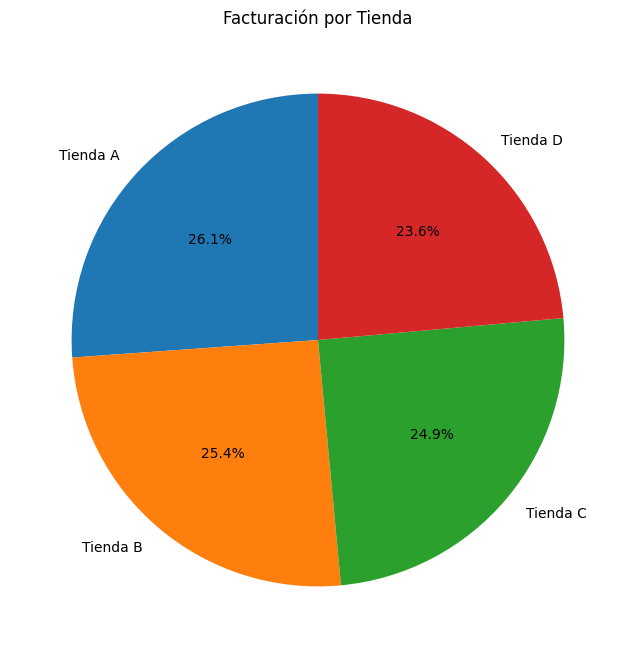

,Tienda,Facturación
0,Tienda A,1.150880e+09
1,Tienda B,1.116344e+09
2,Tienda C,1.098020e+09
3,Tienda D,1.038376e+09


In [40]:
# Grafico de las Ventas totales de cada tienda
total_invoice.set_index('Tienda')['Facturación'].plot(
    kind='pie',
    figsize=(8,8),
    autopct='%1.1f%%',
    startangle=90,
    legend=False
)

plt.title('Facturación por Tienda')
plt.ylabel('')
plt.show()

display(total_invoice)


# 2. Ventas por categoría

Obtenemos las ventas individuales de cada categoria de producto y su respectiva tienda

In [81]:
#Obtenemos las categorias y las cruzamos por tienda
category_sales = pd.crosstab(df['Tienda'], df['Categoría del Producto'])

popularity = (df.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Número de Ventas'))
popularity = popularity.sort_values(by=['Tienda', 'Número de Ventas'], ascending=[True, True])
popular_category = (
    popularity.loc[
        popularity.groupby('Tienda')['Número de Ventas'].idxmax()
    ]
    .reset_index(drop=True)
)


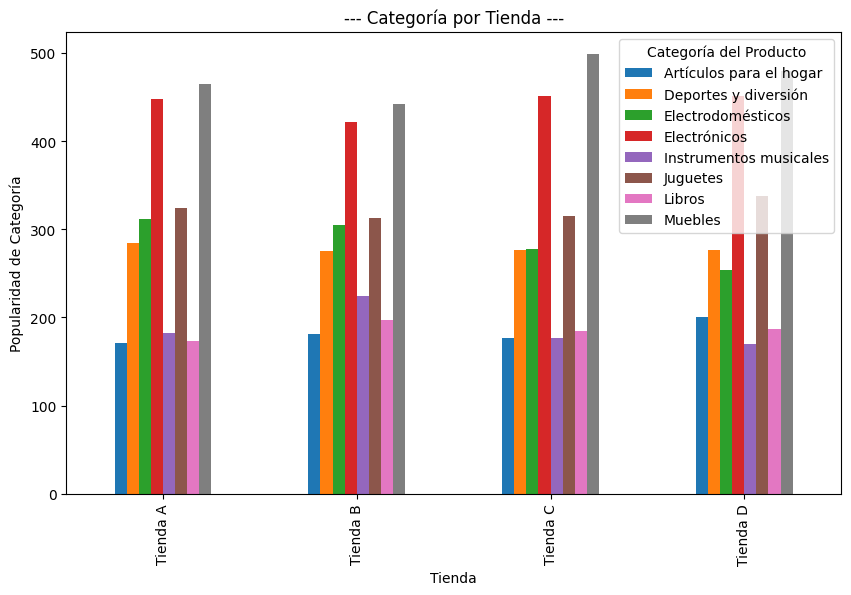

,Tienda,Categoría del Producto,Número de Ventas
0,Tienda A,Muebles,465
1,Tienda B,Muebles,442
2,Tienda C,Muebles,499
3,Tienda D,Muebles,480


In [82]:
category_sales.plot(kind='bar', figsize=(10,6))
plt.title('--- Categoría por Tienda ---')
plt.xlabel('Tienda')
plt.ylabel('Popularidad de Categoría')

plt.show()
display(popular_category)

# 3. Calificación promedio de la tienda


In [69]:
# Calificación promedio de la tienda
average_rating = df.groupby('Tienda')['Calificación'].mean().reset_index()
average_rating = average_rating.sort_values(by='Calificación', ascending=False)

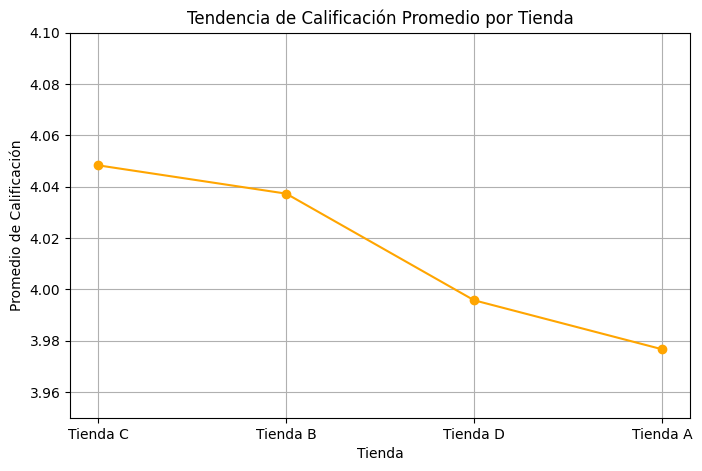

,Tienda,Calificación
2,Tienda C,4.048326
1,Tienda B,4.037304
3,Tienda D,3.995759
0,Tienda A,3.976685


In [70]:
plt.figure(figsize=(8, 5))
plt.plot(average_rating['Tienda'], average_rating['Calificación'], marker='o', color='orange')
plt.title('Tendencia de Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Calificación')
plt.ylim(3.95, 4.1)
plt.grid(True)
plt.show()
display (average_rating)


# 4. Productos más y menos vendidos

In [100]:
# Contar número de ventas por producto y tienda
ventas_por_producto = (
    df.groupby(['Tienda', 'Producto'])
      .size()
      .reset_index(name='Cantidad de Ventas')
      .sort_values(['Tienda', 'Cantidad de Ventas'], ascending=[True, False])
)

# los 5 mas vendidos
top5_por_tienda = ventas_por_producto.groupby('Tienda').head(5).reset_index(drop=True)

# los 5 menos vendidos
bottom5_por_tienda = (
    ventas_por_producto.groupby('Tienda')
    .tail(5)
    .sort_values(['Tienda', 'Cantidad de Ventas'], ascending=[True, True])
    .reset_index(drop=True)
)

display(top5_por_tienda)
display(bottom5_por_tienda)

,Tienda,Producto,Cantidad de Ventas
0,Tienda A,Armario,60
1,Tienda A,Microondas,60
2,Tienda A,TV LED UHD 4K,60
3,Tienda A,Secadora de ropa,58
4,Tienda A,Bloques de construcción,56
5,Tienda B,Iniciando en programación,65
6,Tienda B,Microondas,62
7,Tienda B,Batería,61
8,Tienda B,Guitarra acústica,58
9,Tienda B,Pandereta,58


,Tienda,Producto,Cantidad de Ventas
0,Tienda A,Auriculares con micrófono,33
1,Tienda A,Celular ABXY,33
2,Tienda A,Olla de presión,35
3,Tienda A,Pandereta,36
4,Tienda A,Mochila,39
5,Tienda B,Juego de mesa,32
6,Tienda B,Impresora,34
7,Tienda B,Mesa de comedor,34
8,Tienda B,Sillón,35
9,Tienda B,Auriculares,37


# 5. Envío promedio por tienda

In [76]:
# Costo de envío promedio por tienda
average_shiping = df.groupby('Tienda')['Costo de envío'].mean().reset_index()
average_shiping = average_shiping.sort_values(by='Costo de envío', ascending=True)

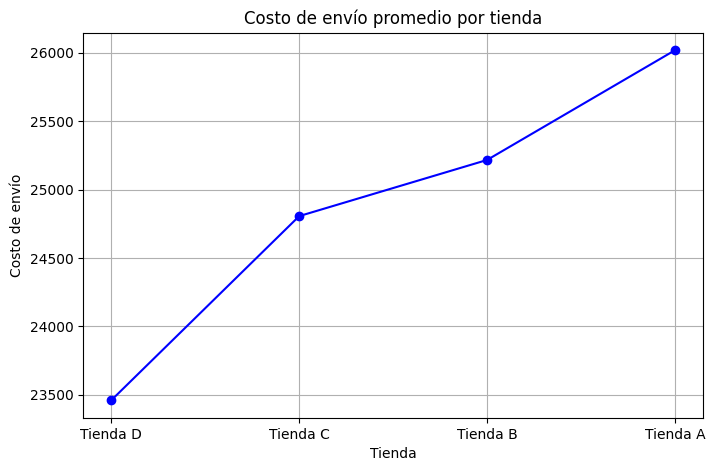

,Tienda,Costo de envío
3,Tienda D,23459.457167
2,Tienda C,24805.680373
1,Tienda B,25216.235693
0,Tienda A,26018.609580


In [77]:
plt.figure(figsize=(8, 5))
plt.plot(average_shiping['Tienda'], average_shiping['Costo de envío'], marker='o', color='blue')
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío')
plt.grid(True)
plt.show()
display (average_shiping)